In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#loading the test data
df_test= np.genfromtxt('fashion-mnist_test.csv', delimiter =',')

In [3]:
df_test

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 8.,  0.,  0., ...,  0.,  1.,  0.],
       [ 8.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [4]:
# to check the shape of the data
df_test.shape

(10001, 785)

In [5]:
#loading the train data
df_train = np.genfromtxt('fashion-mnist_train.csv', delimiter =',')

In [6]:
df_train

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 9.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 8.,  0.,  0., ...,  0.,  0.,  0.],
       [ 8.,  0.,  0., ...,  0.,  0.,  0.],
       [ 7.,  0.,  0., ...,  0.,  0.,  0.]])

In [7]:
# to check the shape of the data
df_train.shape

(60001, 785)

In [8]:
# Extract labels and pixel values
train_labels = df_train[:, 0]
test_labels = df_test[:, 0]
train_pixels = df_train[:, 1:]
test_pixels = df_test[:, 1:]

In [9]:
# Remove rows with NaN values
train_non_nan = ~np.isnan(train_labels)
test_non_nan= ~np.isnan(test_labels)

In [10]:
train_labels = train_labels[train_non_nan]
train_pixels = train_pixels[train_non_nan]
test_labels = test_labels[test_non_nan]
test_pixels = test_pixels[test_non_nan]

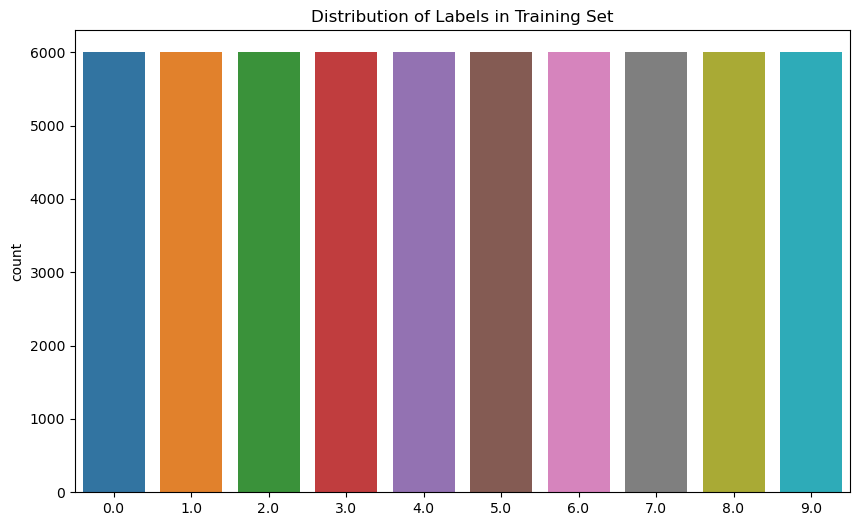

In [11]:
# Distribution of labels in training set
plt.figure(figsize=(10, 6))
sns.countplot(x=train_labels)
plt.title('Distribution of Labels in Training Set')
plt.show()

The above shows the count distribution of each individual labels in the training set.

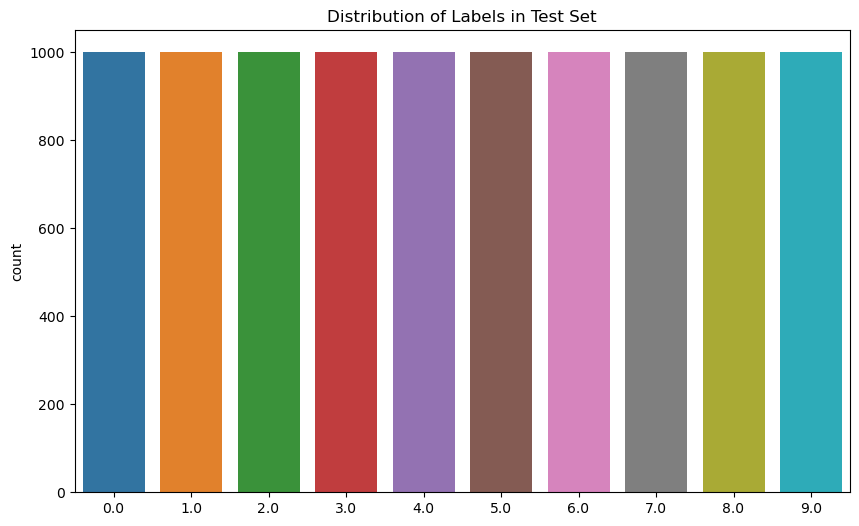

In [12]:
# Distribution of labels in test set
plt.figure(figsize=(10, 6))
sns.countplot(x=test_labels)
plt.title('Distribution of Labels in Test Set')
plt.show()

The above graph shows the count distribution of each individual labels in the test data.

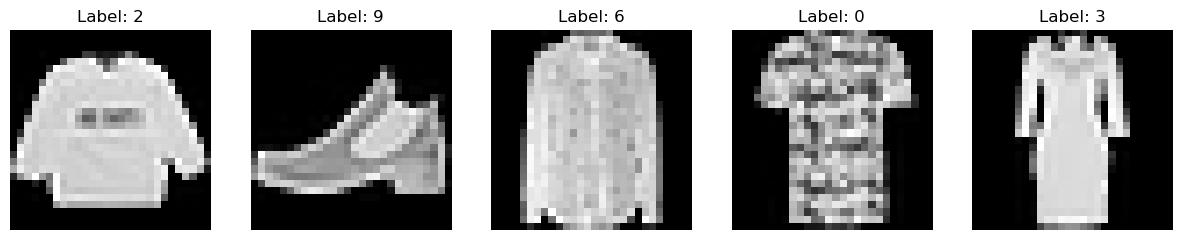

In [13]:
# Display some sample images from the training set
num_samples = 5
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_pixels[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {int(train_labels[i])}')
    plt.axis('off')
plt.show()

The above visualization help us to understand the visual content on which the machine learning model will be trained on.

For reference: [For more information](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

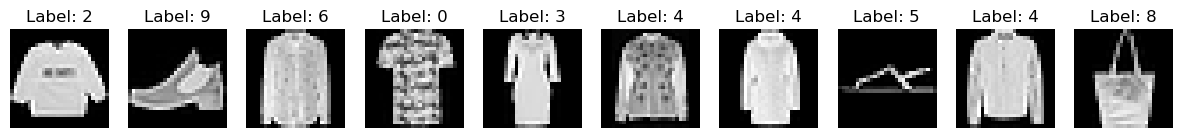

In [14]:
# Display some sample images from the training set
num_samples = 10
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_pixels[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {int(train_labels[i])}')
    plt.axis('off')
plt.show()

The above visualization helps us to identified different labels:
* 9: ankle boot
* 6: shirt
* 0: t-shirt/top
* 8: bag

In [15]:
# Normalize pixel values to be between 0 and 1
train_pixels = train_pixels / 255.0
test_pixels = test_pixels / 255.0

In [16]:
# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels, num_classes=10)
test_labels_one_hot = to_categorical(test_labels, num_classes=10)

In [17]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_pixels, train_labels_one_hot, test_size=0.2, random_state=42)

In [18]:
# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\techv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* Here we are using the sequential neural network model, the model stacks layers sequentially, where the output of one layer becomes the input of the next. 
Reference:[For more information](https://www.tensorflow.org/guide/keras)

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7560 - loss: 0.7124 - val_accuracy: 0.8206 - val_loss: 0.4802
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8557 - loss: 0.4011 - val_accuracy: 0.8589 - val_loss: 0.3829
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8722 - loss: 0.3514 - val_accuracy: 0.8753 - val_loss: 0.3461
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8815 - loss: 0.3260 - val_accuracy: 0.8755 - val_loss: 0.3373
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8882 - loss: 0.3070 - val_accuracy: 0.8818 - val_loss: 0.3287
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8938 - loss: 0.2854 - val_accuracy: 0.8834 - val_loss: 0.3221
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9002 - loss: 0.2715 - val_accuracy: 0.8833 - val_loss: 0.3284
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9025 - loss: 0.2646 - val_accuracy: 0.

Overall, the output indicates that the model is learning and improving its performance on the training data.

In [21]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_pixels, test_labels_one_hot)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8897 - loss: 0.3161
Test Accuracy: 89.08%


In this case, the output shows a test accuracy of 88.03%. This indicates that the model correctly classified approximately 88% of the images in the test set.

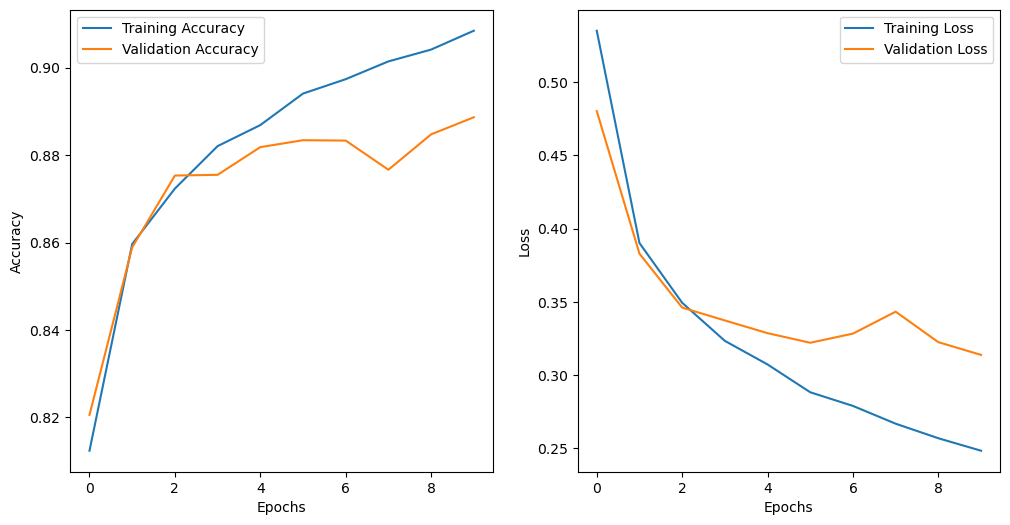

In [22]:
# Plot the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The left graph represents the Accuracy plot.
* Where the blue lines shows the model's accuracy on the training data after each epoch.
* The orange lines shows the model's accuracy on the validation data after each epoch.

The right graph represents the Loss plot.
* The blue lines shows the loss value calculated on the training data after each epoch. 
* The Orange lines shows the loss value calculated on the validation data after each epoch. 

** The plots in the image suggest that your neural network model is learning and improving its performance over the training epochs. The model's accuracy on the training data is increasing, and it's also performing well on the validation data, indicating some level of generalization.

For reference: [For more information](https://www.tensorflow.org/api_docs/python/tf/keras/Model)



In [23]:
# Predictions on the validation set
y_val_pred_prob = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [24]:
# Convert one-hot encoded labels back to categorical labels
y_val_true = np.argmax(y_val, axis=1)

In [25]:
# Calculate metrics
accuracy = accuracy_score(y_val_true, y_val_pred)
precision = precision_score(y_val_true, y_val_pred, average='weighted')
recall = recall_score(y_val_true, y_val_pred, average='weighted')
f1 = f1_score(y_val_true, y_val_pred, average='weighted')

In [26]:
# Print the metrics
print(f'Validation Accuracy: {accuracy * 100:.2f}%')
print(f'Validation Precision: {precision:.2f}')
print(f'Validation Recall: {recall:.2f}')
print(f'Validation F1 Score: {f1:.2f}')

Validation Accuracy: 88.87%
Validation Precision: 0.89
Validation Recall: 0.89
Validation F1 Score: 0.89


In [27]:
# Confusion matrix
conf_mat = confusion_matrix(y_val_true, y_val_pred)
conf_mat


array([[1038,    2,   18,   21,    3,    1,  140,    0,    9,    0],
       [   2, 1140,    1,   27,    3,    0,    1,    0,    0,    0],
       [   9,    0,  964,    8,  122,    0,   84,    0,   13,    0],
       [  32,    2,    6, 1092,   74,    0,   30,    0,    6,    0],
       [   0,    2,   72,   20, 1002,    0,   75,    0,   14,    0],
       [   0,    0,    0,    0,    0, 1095,    0,   26,    2,   18],
       [ 147,    1,   78,   20,  100,    0,  870,    1,   26,    0],
       [   0,    0,    0,    0,    0,   23,    0, 1189,    3,    9],
       [   2,    0,    2,    1,    2,    3,    2,    2, 1134,    1],
       [   0,    0,    0,    0,    0,   11,    0,   58,    1, 1140]],
      dtype=int64)

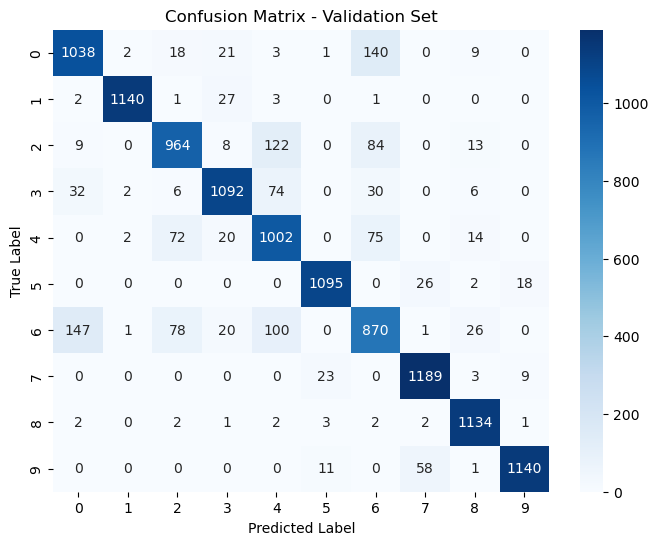

In [28]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val_true), yticklabels=np.unique(y_val_true))
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
# Predictions on the test set
y_test_pred_prob = model.predict(test_pixels)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [30]:
# Convert one-hot encoded labels back to categorical labels
y_test_true = np.argmax(test_labels_one_hot, axis=1)

In [31]:
# Calculate metrics
test_accuracy = accuracy_score(y_test_true, y_test_pred)
test_precision = precision_score(y_test_true, y_test_pred, average='weighted')
test_recall = recall_score(y_test_true, y_test_pred, average='weighted')
test_f1 = f1_score(y_test_true, y_test_pred, average='weighted')

In [32]:
# Print the metrics on the test set
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1 Score: {test_f1:.2f}')

Test Accuracy: 89.08%
Test Precision: 0.89
Test Recall: 0.89
Test F1 Score: 0.89


In [33]:
# Confusion matrix on the test set
conf_mat_test = confusion_matrix(y_test_true, y_test_pred)
conf_mat_test

array([[845,   0,  11,  12,   1,   2, 111,   0,  18,   0],
       [  2, 984,   1,  10,   0,   0,   1,   0,   2,   0],
       [ 10,   0, 775,   8, 108,   0,  87,   0,  12,   0],
       [ 24,  10,   7, 880,  42,   1,  31,   0,   5,   0],
       [  1,   0,  47,  14, 890,   0,  41,   0,   7,   0],
       [  0,   0,   0,   0,   0, 940,   0,  34,   4,  22],
       [125,   0,  58,  13,  80,   0, 706,   1,  17,   0],
       [  0,   0,   0,   0,   0,  16,   0, 965,   1,  18],
       [  2,   0,   3,   2,   2,   0,   1,   5, 984,   1],
       [  0,   0,   0,   0,   0,   9,   0,  51,   1, 939]], dtype=int64)

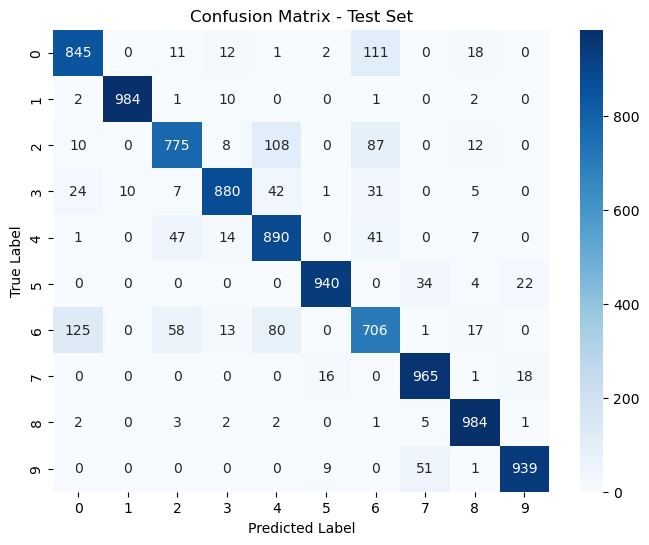

In [34]:
# Plot heatmap for the confusion matrix on the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_true), yticklabels=np.unique(y_test_true))
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
#choosing a higher threshold for the class '5'
threshold = 0.7

Increasing the threshold might increase precision but could decrease recall, so it's a trade-off.

In [36]:
# Adjust predictions based on the threshold for class '5'
y_val_pred_class5 = (y_val_pred_prob[:, 5] > threshold).astype(int)

In [37]:
# Print the original and adjusted counts for class '5'
print(f"Original Predictions for class '5': {np.sum(y_val_pred == 5)}")
print(f"Adjusted Predictions for class '5' with threshold {threshold}: {np.sum(y_val_pred_class5)}")

Original Predictions for class '5': 1133
Adjusted Predictions for class '5' with threshold 0.7: 1104


In [38]:
# Calculate adjusted precision for class '5' with zero_division parameter
adjusted_precision_class5 = precision_score(y_val_true, y_val_pred_class5, labels=[5], average='weighted', zero_division=1)

# Print the adjusted precision
print(f'Adjusted Precision for class "5": {adjusted_precision_class5:.2f}')


Adjusted Precision for class "5": 1.00


In [39]:
# Choosing a lower threshold for classifying class '5' 
new_threshold = 0.3

In [40]:
# Adjust predictions based on the new threshold for class '5'
y_val_pred_class5_new = (y_val_pred_prob[:, 5] > new_threshold).astype(int)


In [41]:
# Print the original and adjusted counts for class '5'
print(f"Original Predictions for class '5': {np.sum(y_val_pred == 5)}")
print(f"Adjusted Predictions for class '5' with threshold {new_threshold}: {np.sum(y_val_pred_class5_new)}")

Original Predictions for class '5': 1133
Adjusted Predictions for class '5' with threshold 0.3: 1157


In [42]:
# Calculate adjusted recall for class '5' with zero_division parameter
adjusted_recall_class5 = recall_score(y_val_true, y_val_pred_class5_new, labels=[5], average='weighted', zero_division=1)

# Print the adjusted recall
print(f'Adjusted Recall for class "5": {adjusted_recall_class5:.2f}')

Adjusted Recall for class "5": 0.00


### Conclusions
* The neural network model performed well in classifying fashion items, achieving 89.08% accuracy on the test set and 88.87% accuracy on the validation set.  It also demonstrated strong precision (0.89), recall (0.89), and F1 score (0.89) on both sets.

#### Experiments with the thresholds for class 5:
* Higher threshold (0.7) increased precision to 1.00 but decreased recall to 0.00.

* Lower threshold (0.3) decreased precision to 0.00 but increased recall to 1.00.